In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re

sns.set_style('whitegrid')

In [2]:

from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [3]:
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, precision_score, f1_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline, make_pipeline

In [4]:
from imblearn.over_sampling import SMOTE

![image](image/titanic.jpeg)

- https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
- https://towardsdatascience.com/cross-validation-in-machine-learning-72924a69872f
- https://docs.aws.amazon.com/pt_br/machine-learning/latest/dg/cross-validation.html

In [5]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")
df_combine = pd.concat([df_train, df_test])#, axis = 1)

| Variable |      Definition      |       Key       |
|----------|:--------------------:|----------------:|
| survival |  Survival            | 0 = No, 1 = Yes |
| sex      |	Sex	| |
| Age |	Age in years	| |
| sibsp |	# of siblings / spouses aboard the Titanic	| |
| parch |	# of parents / children aboard the Titanic	| |
| ticket |	Ticket number	| |
| fare |	Passenger fare	| |
| cabin |	Cabin number	| |
| embarked |	Port of Embarkation	| C = Cherbourg, Q = Queenstown, S = Southampton|

In [6]:
df_combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [8]:
df_combine.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [9]:
df_combine.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

# Survived

In [10]:
print("% of who survived:", round(df_combine['Survived'].mean() * 100, 2), "%")
print("% of who not survived:",round((1 - df_combine['Survived'].mean()) * 100, 2), "%")

% of who survived: 38.38 %
% of who not survived: 61.62 %


### Class survived

In [11]:
df_combine[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


### Sex survived

In [12]:
df_combine[["Sex", "Survived"]].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


### Sibling and Spouse  survived

In [13]:
df_combine[["SibSp", "Survived"]].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


## FamilySize 

In [14]:
df_combine[["Parch", "Survived"]].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000
9,NaN


In [15]:
df_combine['FamilySize'] = df_combine['SibSp'] + df_combine['Parch'] + 1

df_combine[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


###  Parent and Child survived

In [16]:
df_combine['IsAlone'] = 0
df_combine.loc[df_combine['FamilySize'] == 1, 'IsAlone'] = 1

df_combine[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


### Filter Embarked


In [17]:
# Calcula o porto mais frequente
freq_port = df_combine['Embarked'].dropna().mode()[0]

# Preenche NaNs com o porto mais frequente
df_combine['Embarked'] = df_combine['Embarked'].fillna(freq_port)

# Seu código original
df_combine[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### Conclusion
Only 38% survived the crash. In this way we must look for correlations between the items we have. Analyze by pivoting features:
- **Sex:** Women make up 35% of the crew. Even with a smaller presence, 74% of them survived;
- **Pclass:** There is a correlation between the survivors, with the classification of their cabins;
- **SibSp and Parch:** These features have zero correlation. It will be necessary to change the data

## Plot for Age

<Figure size 2000x1000 with 0 Axes>

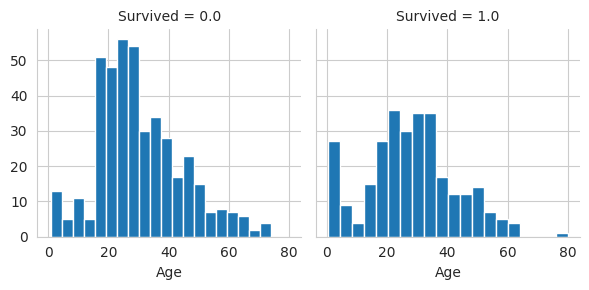

In [18]:
plt.figure(figsize=(20,10))
g = sns.FacetGrid(df_combine, col='Survived')
g.map(plt.hist, 'Age', bins=20)


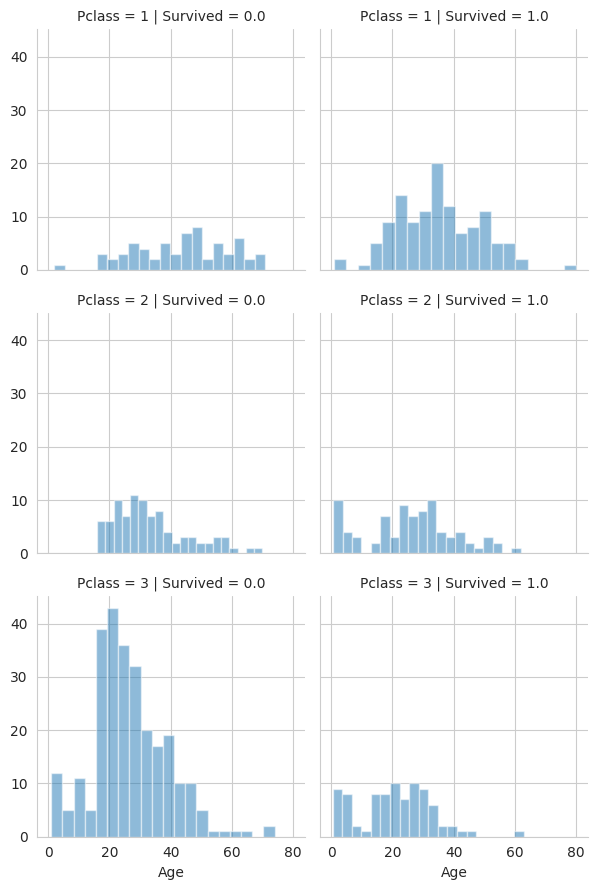

In [19]:
grid = sns.FacetGrid(df_combine, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

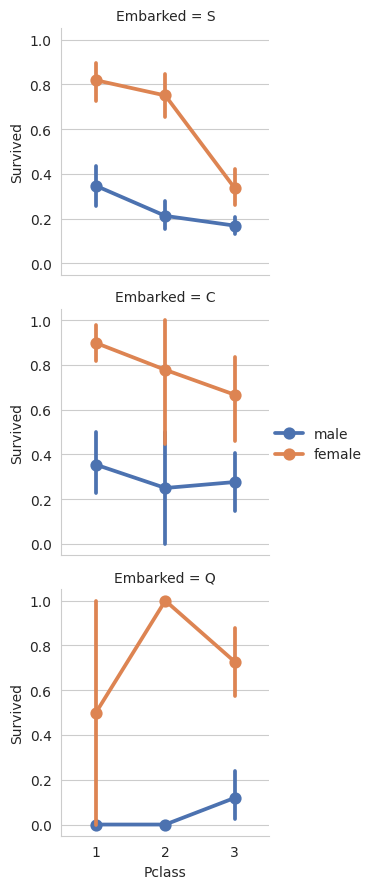

In [20]:
# Determine a order and hue_order based on your data
pclass_order = sorted(df_combine['Pclass'].unique())
sex_order = ['male', 'female']  # or ['female', 'male'], dependendo da sua preferência

grid = sns.FacetGrid(df_combine, row='Embarked')
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', order=pclass_order, hue_order=sex_order)
grid.add_legend()

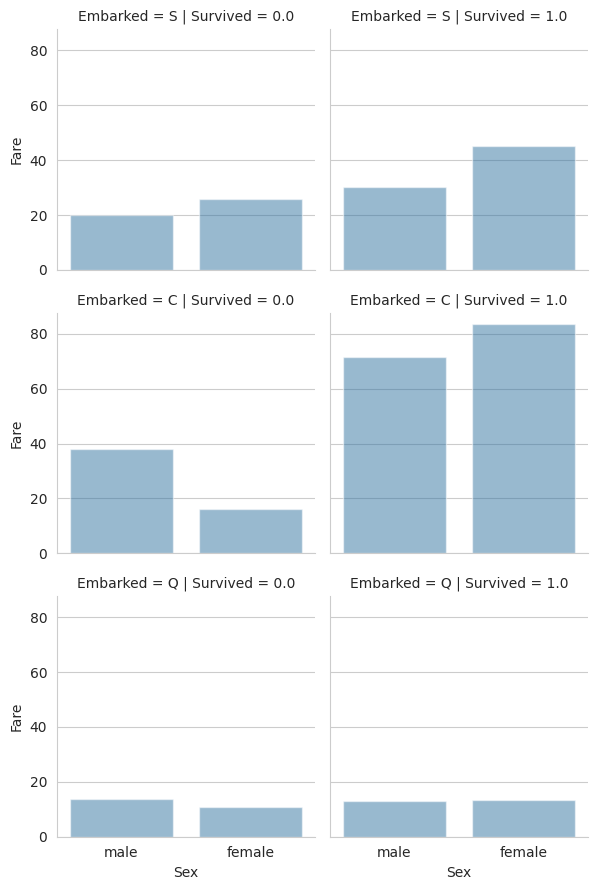

In [21]:
# Determine the order based on your data
sex_order = ['male', 'female']  # Ou ['female', 'male'], dependendo da sua preferência

grid = sns.FacetGrid(df_combine, row='Embarked', col='Survived')
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, errorbar=None, order=sex_order)
grid.add_legend()

## Filter Title

In [22]:
df_combine['Title'] = df_combine['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
df_combine['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [23]:
df_combine['Title'].value_counts()

Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [24]:
df_combine['Title'] = [n if n in ["Mr", "Miss", "Mrs", "Master"] else 'Person' for n in df_combine['Title']]
df_combine['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Person'], dtype=object)

In [25]:
df_combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,Mr


### Filter Age

In [26]:
df_combine['Age'].fillna(df_combine['Age'].median(), inplace=True)
df_combine['AgeBand'] = pd.cut(df_combine['Age'], 5)
df_combine[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False, observed=True).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.0902, 16.136]",0.550000
1,"(16.136, 32.102]",0.344168
2,"(32.102, 48.068]",0.404255
3,"(48.068, 64.034]",0.434783
4,"(64.034, 80.0]",0.090909


In [27]:
df_combine.loc[ df_combine['Age'] <= 16, 'Categori_Age'] = 0
df_combine.loc[(df_combine['Age'] > 16) & (df_combine['Age'] <= 32), 'Categori_Age'] = 1
df_combine.loc[(df_combine['Age'] > 32) & (df_combine['Age'] <= 48), 'Categori_Age'] = 2
df_combine.loc[(df_combine['Age'] > 48) & (df_combine['Age'] <= 64), 'Categori_Age'] = 3
df_combine.loc[(df_combine['Age'] >= 64), 'Categori_Age'] = 4

In [28]:
df_combine['Categori_Age'].value_counts()

Categori_Age
1.0    787
2.0    269
0.0    134
3.0    101
4.0     18
Name: count, dtype: int64

In [29]:
df_combine['Age*Class'] = df_combine.Categori_Age * df_combine.Pclass
df_combine.loc[:, ['Age*Class', 'Categori_Age', 'Pclass']].head(10)

,Age*Class,Categori_Age,Pclass
0,3.0,1.0,3
1,2.0,2.0,1
2,3.0,1.0,3
3,2.0,2.0,1
4,6.0,2.0,3
5,3.0,1.0,3
6,3.0,3.0,1
7,0.0,0.0,3
8,3.0,1.0,3
9,0.0,0.0,2


In [30]:
df_combine['FareBand'] = pd.qcut(df_combine['Fare'], 4)
df_combine[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False, observed=True).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.896]",0.197309
1,"(7.896, 14.454]",0.303571
2,"(14.454, 31.275]",0.441048
3,"(31.275, 512.329]",0.600000


In [31]:
# 1. Preenchendo NaNs
df_combine['Fare'].fillna(df_combine['Fare'].median(), inplace=True)

# 2. Verificando valores infinitos (opcional, mas uma boa prática)
if not np.isfinite(df_combine['Fare']).all():
    # Trate os valores infinitos como você achar melhor. Aqui, estou substituindo-os pela mediana
    median_fare = df_combine['Fare'].median()
    df_combine['Fare'] = df_combine['Fare'].replace([np.inf, -np.inf], median_fare)

# 3. Execute seu código original
df_combine.loc[ df_combine['Fare'] <= 7.91, 'Fare'] = 0
df_combine.loc[(df_combine['Fare'] > 7.91) & (df_combine['Fare'] <= 14.454), 'Fare'] = 1
df_combine.loc[(df_combine['Fare'] > 14.454) & (df_combine['Fare'] <= 31), 'Fare']   = 2
df_combine.loc[ df_combine['Fare'] > 31, 'Fare'] = 3
df_combine['Fare'] = df_combine['Fare'].astype(int)

df_combine = df_combine.drop(['FareBand'], axis=1)

df_combine.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,AgeBand,Categori_Age,Age*Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0,NaN,S,2,0,Mr,"(16.136, 32.102]",1.0,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,3,C85,C,2,0,Mrs,"(32.102, 48.068]",2.0,2.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,1,NaN,S,1,1,Miss,"(16.136, 32.102]",1.0,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3,C123,S,2,0,Mrs,"(32.102, 48.068]",2.0,2.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,1,NaN,S,1,1,Mr,"(32.102, 48.068]",2.0,6.0
5,6,0.0,3,"Moran, Mr. James",male,28.0,0,0,330877,1,NaN,Q,1,1,Mr,"(16.136, 32.102]",1.0,3.0
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,3,E46,S,1,1,Mr,"(48.068, 64.034]",3.0,3.0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,2,NaN,S,5,0,Master,"(0.0902, 16.136]",0.0,0.0
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,1,NaN,S,3,0,Mrs,"(16.136, 32.102]",1.0,3.0
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,2,NaN,C,2,0,Mrs,"(0.0902, 16.136]",0.0,0.0


### Construct Data test and training

In [32]:
# pclass = pd.get_dummies(df_combine['Pclass'], prefix = 'Pclass', drop_first=True)
# title = pd.get_dummies(df_combine['Title'], prefix = 'Title', drop_first=True)
# sex = pd.get_dummies(df_combine['Sex'], prefix = 'Sex', drop_first=True)
# age = pd.get_dummies(df_combine['Age'], prefix = 'Age', drop_first=True)
# fare = pd.get_dummies(df_combine['Fare'], prefix = 'Fare', drop_first=True)
# embarked = pd.get_dummies(df_combine['Embarked'], prefix = 'Embarked', drop_first=True)
# age_class = pd.get_dummies(df_combine['Age*Class'], prefix = 'Age*Class', drop_first=True)
# df_concat = pd.concat([df_combine['Survived'], 
#                        pclass, 
#                        title, 
#                        sex, 
#                        age, 
#                        fare, 
#                        embarked, 
#                        age_class], axis=1)

In [33]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Columns to be encoded
columns_to_encode = ['Pclass', 'Title', 'Sex', 'Categori_Age', 'Fare', 'Embarked', 'Age*Class']

# Create a DataFrame with the selected columns
df_selected = df_combine[columns_to_encode]

# Apply OneHotEncoder to the selected columns
df_encoded = pd.DataFrame()
for column in columns_to_encode:
    encoded_data = encoder.fit_transform(df_selected[[column]])
    column_names = encoder.get_feature_names_out([column])
    df_encoded = pd.concat([df_encoded, pd.DataFrame(encoded_data, columns=column_names)], axis=1)

# Reset the index of df_combine
df_combine_reset = df_combine.reset_index(drop=True)

# Concatenate the encoded DataFrame with the original DataFrame
df_concat = pd.concat([df_combine_reset['Survived'], df_encoded], axis=1)

In [34]:
train = df_concat[:len(df_train)].copy()
test = df_concat[(len(df_combine) - len(df_test)):].copy()
df_concat.shape, train.shape, test.shape

((1309, 25), (891, 25), (418, 25))

In [35]:
X_train = train.drop('Survived', axis = 1)
y_train = train['Survived'] 
X_test = test.drop("Survived", axis=1).copy()
# y_test
X_train.shape, y_train.shape, X_test.shape

((891, 24), (891,), (418, 24))

In [36]:
def benchmark_ml(algorithms, X_train, y_train, cross_validation):
    benchmark_ml = []

    for algorithm_name, algorithm in algorithms.items():
        # print(algorithm_name, algorithm)
        model = algorithm.fit(X_train, y_train)
        accuracy = round(model.score(X_train, y_train) * 100, 2)
        
        train_predict = cross_val_predict(algorithm, X_train, y_train, cv= cross_validation, n_jobs = -1)
        accuracy_cross_validation = round(accuracy_score(y_train, train_predict) * 100, 2)
        recall_score_cross_validation = round(recall_score(y_train, train_predict) * 100, 2)
        precision_score_cross_validation = round(precision_score(y_train, train_predict) * 100, 2)
        f1_score_cross_validation = round(f1_score(y_train, train_predict) * 100, 2)
        
        # confusion_matrix_cross_validation = confusion_matrix(y_train, train_predict)
        # roc_curve_cross_validation = roc_curve(y_train, train_predict)
        
        benchmark_ml.append({'algorithm': algorithm_name,
                             'accuracy (%)': accuracy,
                             'accuracy_cross_validation (%)': accuracy_cross_validation,
                             'recall_score' : recall_score_cross_validation,
                             'precision_score' : precision_score_cross_validation,
                             'f1_score' : f1_score_cross_validation,
                            #  'confusion_matrix' : confusion_matrix_cross_validation,
                            #  'roc_curve' : roc_curve_cross_validation,
                             
                             })
    df_benchmark = pd.DataFrame(benchmark_ml)
    return df_benchmark.sort_values('accuracy_cross_validation (%)', ascending=False)

In [37]:
algorithms = {'Logistic Regression' : LogisticRegression(max_iter = 1000, random_state=42),
              'Decision Tree' : DecisionTreeClassifier(random_state=42),
              'SVM' : SVC(random_state=42),
              'NuSVC' : NuSVC(random_state=42),
              'LinearSVC' : LinearSVC(dual = False, random_state=42),
              'GaussianNB' : GaussianNB(),
              'MultinomialNB' : MultinomialNB(),
              'ComplementNB' : ComplementNB(),
              # 'KNeighborsClassifier' : KNeighborsClassifier(n_clusters=3, n_init=1000),
            #   'KMeans' : KMeans(),
              'Random Forest' : RandomForestClassifier(n_estimators=100, random_state=42),
              'GradientBoostingClassifier' : GradientBoostingClassifier(random_state=42),
              'XGBoost' : XGBClassifier(random_state=42 , n_jobs = -1),
              'CatBoostClassifier' : CatBoostClassifier(random_state=42, verbose=False, save_snapshot=False),
              'Stochastic Gradient Decent' : SGDClassifier(random_state=42), 
              'Perceptron' : Perceptron(random_state=42),
              # 'Linear Regression' : LinearRegression(),
              }

In [38]:
result = benchmark_ml(algorithms, X_train, y_train, cross_validation = 10)
result

,algorithm,accuracy (%),accuracy_cross_validation (%),recall_score,precision_score,f1_score
8,Random Forest,86.20,82.38,71.93,80.13,75.81
11,CatBoostClassifier,86.20,82.27,67.54,83.09,74.52
9,GradientBoostingClassifier,85.07,81.93,66.08,83.39,73.74
10,XGBoost,86.20,81.82,70.47,79.80,74.84
2,SVM,84.96,81.71,64.33,84.29,72.97
1,Decision Tree,86.20,81.03,68.42,79.32,73.47
4,LinearSVC,82.27,80.81,71.35,76.97,74.05
3,NuSVC,82.83,80.58,66.37,79.65,72.41
0,Logistic Regression,82.27,80.13,70.47,76.03,73.14
12,Stochastic Gradient Decent,77.55,79.12,65.50,76.71,70.66


In [39]:
# params = {
#     'learning_rate': [0.01, 0.1, 0.2],
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 4, 5],
#     'min_child_weight': [1, 2, 3],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0],
# }
# cross_validation = 5

In [40]:
# best_algorithm = algorithms[result.iloc[0]['algorithm']]
# # best_algorithm = GradientBoostingClassifier()

# cross_validation = GridSearchCV(estimator = best_algorithm, param_grid = params, cv = cross_validation, n_jobs = -1)

In [41]:
# cross_validation.fit(X_train, y_train)

# # accuracy         
# round(cross_validation.best_score_ * 100, 4)

In [42]:
# # #best parameters
# cross_validation.best_estimator_

In [43]:
# best_algorithm_predict = cross_validation.predict(X_test)
# solution = pd.DataFrame({'PassengerId' : df_test['PassengerId'], 
#                          'Survived' : best_algorithm_predict.astype(int)})

# solution.to_csv('data/solution/test.csv', index = False)

---


In [44]:
def cross_validation(algorithms, X_train, y_train, n_splits, seed_number, oversampling = False):
    cv = KFold(n_splits=n_splits, random_state=seed_number, shuffle=True)
    
    metrics_split = []
    accuracy_cross_validation = []
    recall_score_cross_validation = []
    precision_score_cross_validation = []
    f1_score_cross_validation = []
    
    for algorithm_name, algorithm in algorithms.items():
        for index, (index_train, index_validation) in enumerate(cv.split(X_train)):
            
            X_train_split, y_train_split = X_train.iloc[index_train, :], y_train.loc[index_train]
            X_train_validation, y_train_validation = X_train.iloc[index_validation, :], y_train.loc[index_validation]
            if oversampling:
                smote = SMOTE(random_state = seed_number)
                X_train_split, y_train_split = smote.fit_resample(X_train_split, y_train_split)
        
            train_predict = algorithm.fit(X_train_split, y_train_split.values.flatten())
            predict_validation = algorithm.predict(X_train_validation)

        
            accuracy_cross_validation.append(round(accuracy_score(y_train_validation, predict_validation) * 100, 2))
            recall_score_cross_validation.append(round(recall_score(y_train_validation, predict_validation) * 100, 2))
            precision_score_cross_validation.append(round(precision_score(y_train_validation, predict_validation) * 100, 2))
            f1_score_cross_validation.append(round(f1_score(y_train_validation, predict_validation) * 100, 2))
            
            # print(f'Split accuracy {index}: {accuracy_cross_validation}')

            
        metrics_split.append({'algorithm': algorithm_name,
                            'accuracy_cross_validation (%)': round(np.mean(accuracy_cross_validation), 4),
                            'recall_score' : round(np.mean(recall_score_cross_validation), 4),
                            'precision_score' : round(np.mean(precision_score_cross_validation), 4),
                            'f1_score' : round(np.mean(f1_score_cross_validation), 4),
                            })
    metrics_split = pd.DataFrame(metrics_split)
    return metrics_split.sort_values('accuracy_cross_validation (%)', ascending=False)

In [45]:
n_splits = 10
seed_number = 42

In [46]:
accuracy_without_split = cross_validation(algorithms, X_train, y_train, n_splits, seed_number)
accuracy_without_split

,algorithm,accuracy_cross_validation (%),recall_score,precision_score,f1_score
2,SVM,81.5170,68.8560,80.5550,73.8243
3,NuSVC,81.1428,68.1253,80.1985,73.2623
1,Decision Tree,81.0305,69.8920,78.5770,73.5955
4,LinearSVC,80.9410,68.6332,79.3814,73.1996
0,Logistic Regression,80.3560,70.7040,76.3820,73.1780
11,CatBoostClassifier,77.4771,71.9552,75.5370,71.8769
12,Stochastic Gradient Decent,77.1974,71.6222,75.3396,71.4485
10,XGBoost,77.0317,72.2596,74.8802,71.6356
13,Perceptron,76.9658,70.9875,75.2636,70.8274
9,GradientBoostingClassifier,76.4971,72.4324,74.2076,71.2774


In [47]:

accuracy_split = cross_validation(algorithms, X_train, y_train, n_splits, seed_number, oversampling = True)
accuracy_split

,algorithm,accuracy_cross_validation (%),recall_score,precision_score,f1_score
1,Decision Tree,79.6870,75.0475,73.4265,73.8270
2,SVM,79.6867,74.3533,73.6557,73.6227
3,NuSVC,79.4902,74.7108,73.0218,73.5042
4,LinearSVC,79.2598,75.1496,72.3750,73.4002
0,Logistic Regression,78.0050,77.4470,69.0880,72.8630
12,Stochastic Gradient Decent,76.8116,76.3697,71.0222,72.2829
11,CatBoostClassifier,76.5813,76.6207,70.6863,72.2223
13,Perceptron,76.4174,76.2612,70.7954,71.9311
10,XGBoost,76.0847,76.9755,69.9362,71.9333
9,GradientBoostingClassifier,75.5001,77.2413,69.1286,71.5426
